Question 1B: This module we'll be looking at the New York City tree census.

Data is available at https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35

The Purpose of this assignment is to get familier with Dash -Ploty python



#### Loading Libraries

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd

#### Reading Data

In [3]:
env = pd.read_csv("2015StreetTreesCensus_TREES.csv")

envdata = env.iloc[:,[8,10,11,30]]

#### Health proportion for each species

##### Data Preprocessing and reshaping

In [4]:
envdata1 = env.iloc[:,[8,10,30]]

con = envdata1.groupby(['boroname','spc_common','health'])['spc_common'].count().unstack(fill_value = 0).reset_index()

con1 = envdata1.groupby(['boroname','health'])['boroname'].count().unstack(fill_value = 0).reset_index()

fnameDict = {'Plants':con["spc_common"].tolist() }

df = pd.DataFrame(fnameDict)

df.reset_index(inplace=True)

df.columns = ['Abra', 'Plants']

con.drop(con.columns[[0,1]],axis =1,inplace = True)

lol = con.values.tolist()

In [5]:
dropdown_options = [
            {'label': df['Plants'][i] , 'value':df['Abra'][i]} for i in range(655)
          
]

#### App layout

In [6]:
app = dash.Dash()

app.layout = html.Div([
    html.H1(children='Health proportion for each species of plant'),
    dcc.Dropdown(
        id='dropdown',
        options=dropdown_options,
        value='1'
    ),
    html.Div(id='target')
])

@app.callback(Output('target', 'children'), [Input('dropdown', 'value')])

def display_content(value):
    data = [
        {
            'labels': ['Fair','Good','Poor'] ,
            'values': [lol[i] for i in range(0,655)][int(value)-1],
            'type': 'pie',
        },
    ]

    return html.Div([
        dcc.Graph(
            id='graph',
            figure={
                'data': data,
                'layout': {
                    'margin': {
                        'l': 30,
                        'r': 0,
                        'b': 30,
                        't': 0
                    },
                    'legend': {'x': 0, 'y': 1,'z': 2}
                }
                    
            }
        )
    ])


if __name__ == '__main__':
    app.run_server(debug=True)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



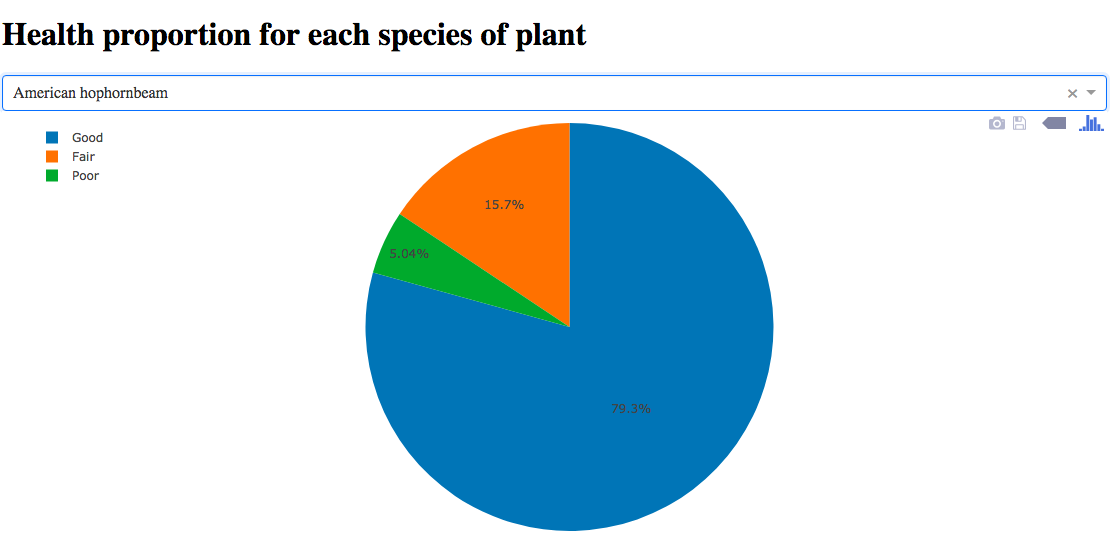

In [7]:
from IPython.display import Image
Image(filename='/Users/GD/Desktop/Species.png')